In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
encoder = LabelEncoder()

In [3]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
mask = data_train.isnull()
rows_with_nan = data_train[mask.any(axis=1)]
print(data_train.shape)
print(len(rows_with_nan))
print(rows_with_nan)

(891, 12)
708
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp 

In [6]:
encoder = LabelEncoder()
X_names = ['Sex','Age','SibSp','Parch','Fare','Embarked'] #'Age'
y_names = ['Survived']

In [7]:
X = data_train[X_names]
y = data_train[y_names]

In [8]:
X['Sex'] = encoder.fit_transform(X['Sex'])
X['Embarked'] = encoder.fit_transform(X['Embarked'])

In [9]:
from sklearn.impute import SimpleImputer, KNNImputer

#imputer = SimpleImputer(strategy='mean')
imputer = KNNImputer(n_neighbors=10)
X_imputed = imputer.fit_transform(X.to_numpy())
X['Age'] = X_imputed
X_imputed

array([[ 1.    , 22.    ,  1.    ,  0.    ,  7.25  ,  2.    ],
       [ 0.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 0.    , 26.    ,  0.    ,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    , 25.3   ,  1.    ,  2.    , 23.45  ,  2.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  0.    ],
       [ 1.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
mask = X.isnull()
rows_with_nan = X[mask.any(axis=1)]
print(X.shape)
print(len(rows_with_nan))
print(rows_with_nan)

(891, 6)
0
Empty DataFrame
Columns: [Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [12]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

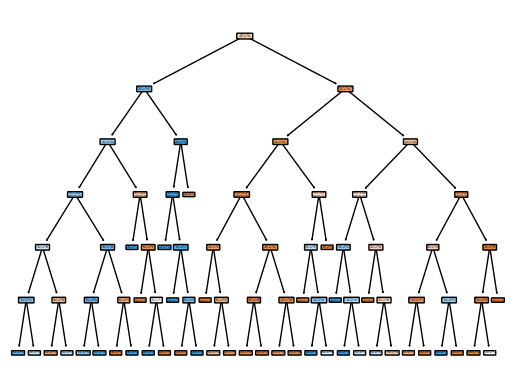

In [13]:
fig = plot_tree(model, 
          feature_names = X_names, 
          filled = True, 
          rounded = True)

In [14]:
y_pred = model.predict(X_test)

In [15]:
k = 10
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.07)
Precision: 0.77 (+/- 0.10)
Recall: 0.66 (+/- 0.14)


In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [17]:
k = 10
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='precision')
print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(model, X, y, cv=k, scoring='recall')
print("Recall: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.04)
Precision: 0.76 (+/- 0.06)
Recall: 0.67 (+/- 0.14)


In [18]:
model.coef_

array([[-1.3598433 , -1.3598433 , -0.30745076, -0.12317805,  0.01343657,
        -0.32837778]])

In [19]:
X_names = ['Sex','Age','SibSp','Parch','Fare','Embarked'] #'Age'